### 초기설정

In [1]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [4]:
import pandas as pd

# df_2018 = pd.read_excel('/content/2018.xlsx')
# df_2019 = pd.read_excel('/content/2019.xlsx')
# df_2020 = pd.read_excel('/content/2020.xlsx')
# df_2021 = pd.read_excel('/content/2021.xlsx')
# df_2022 = pd.read_excel('/content/2022.xlsx')
# df_2023 = pd.read_excel('/content/2023.xlsx')
df_2024 = pd.read_excel('/content/2024.xlsx')

In [14]:
# grade_map = {
#     '① 전혀 그렇지 않다': 1,
#     '② 별로 그렇지 않다': 2,
#     '③ 보통이다': 3,
#     '④ 대체로 그렇다': 4,
#     '⑤ 매우 그렇다': 5
# }

# df_2018['Q16'] = df_2018['Q16'].map(grade_map)

In [23]:
# df_2018['국가명'] = df_2018['COUNTRY']

In [5]:
country_map = {
    1: '일본',
    2: '중국',
    3: '홍콩',
    4: '싱가포르',
    5: '대만',
    6: '태국',
    7: '말레이시아',
    8: '호주',
    9: '미국',
    10: '캐나다',
    11: '영국',
    12: '독일',
    13: '프랑스',
    14: '러시아',
    15: '중동',
    16: '인도',
    17: '필리핀',
    18: '인도네시아',
    19: '베트남',
    20: '몽골',
    97: '기타'
}

# 2018은 이미 COUNTY 컬럼에 국가명이 적혀있음.
# df_2019['국가명'] = df_2019['D_COU1'].map(country_map)
# df_2020['국가명'] = df_2020['D_NAT'].map(country_map)
# df_2021['국가명'] = df_2021['D_NAT'].map(country_map)
# df_2022['국가명'] = df_2022['D_NAT'].map(country_map)
# df_2023['국가명'] = df_2023['D_NAT'].map(country_map)
df_2024['국가명'] = df_2024['D_NAT'].map(country_map)

- 활동명 매핑 (주요활동/만족활동) - 2022~2024

In [16]:
# 1. 활동명 매핑
q4a_mapping_2022 = {
    "Q4A01": "식도락 관광", "Q4A02": "쇼핑", "Q4A03": "자연경관 감상", "Q4A04": "고궁/역사 유적지 방문",
    "Q4A05": "전통문화체험", "Q4A06": "박물관, 전시관 관람", "Q4A07": "K-POP/한류스타 공연장 방문",
    "Q4A08": "드라마/영화 촬영지 방문", "Q4A09": "연극, 뮤지컬, 발레 등 공연 관람", "Q4A10": "지역 축제 참여",
    "Q4A11": "유흥/오락", "Q4A12": "뷰티/의료관광", "Q4A13": "스포츠/레포츠 및 비즈니스 활동",
    "Q4A14": "업무수행", "Q4A15": "연수/교육/연구", "Q4A16": "시찰(산업시설 등)", "Q4A17": "기타"
}

q4b_code_mapping_2022 = {
    1: "식도락 관광", 2: "쇼핑", 3: "자연경관 감상", 4: "고궁/역사 유적지 방문",
    5: "전통문화체험", 6: "박물관, 전시관 관람", 7: "K-POP/한류스타 공연장 방문",
    8: "드라마/영화 촬영지 방문", 9: "연극, 뮤지컬, 발레 등 공연 관람", 10: "지역 축제 참여",
    11: "유흥/오락", 12: "뷰티/의료관광", 13: "스포츠/레포츠 및 비즈니스 활동",
    14: "업무수행", 15: "연수/교육/연구", 16: "시찰(산업시설 등)", 17: "기타"
}

q4a_cols = list(q4a_mapping_2022.keys())
q4b_cols = ["Q4B1", "Q4B2", "Q4B3"]

# 2. 주요활동 추출 함수
def get_q4a_activities(row):
    return [q4a_mapping_2022[col] for col in q4a_cols if col in row and pd.notna(row[col])]

# 3. 만족활동 추출 함수
def get_q4b_satisfaction(row):
    return [q4b_code_mapping_2022.get(int(row[col]), f"코드 {row[col]}")
            for col in q4b_cols if col in row and pd.notna(row[col])]

# 4. 적용 (df_2022가 정의된 상태에서만)
df_2022["주요활동"] = df_2022.apply(get_q4a_activities, axis=1)
df_2022["만족활동"] = df_2022.apply(get_q4b_satisfaction, axis=1)


In [17]:
# 1. 활동명 매핑
q8a_mapping_2023 = {
    "Q8a01": "식도락(음식/미식) 관광", "Q8a02": "쇼핑", "Q8a03": "자연경관 감상", "Q8a04": "고궁/역사 유적지 방문",
    "Q8a05": "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)", "Q8a06": "박물관, 전시관 관람",
    "Q8a07": "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문", "Q8a08": "연극, 뮤지컬, 발레 등 공연 관람",
    "Q8a09": "지역 축제 참여", "Q8a10": "유흥(나이트라이프 활동 및 카지노 등)", "Q8a11": "오락(놀이공원 및 테마파크 방문 등)",
    "Q8a12": "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)", "Q8a13": "치료/건강검진(피부과, 성형외과, 내외과 등 입원, 수술 등)",
    "Q8a14": "스포츠/레포츠 관람 (야구, 축구, 농구 등)", "Q8a15": "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)",
    "Q8a16": "국제회의(컨벤션, 국제회의, 전시 등)", "Q8a17": "비즈니스 전문활동(업무회의, 산업시설 시찰 등)",
    "Q8a18": "연수, 교육, 연구", "Q8a19": "기타"
}

q8b_code_mapping_2023 = {
    1: "식도락(음식/미식) 관광", 2: "쇼핑", 3: "자연경관 감상", 4: "고궁/역사 유적지 방문",
    5: "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)", 6: "박물관, 전시관 관람",
    7: "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문", 8: "연극, 뮤지컬, 발레 등 공연 관람",
    9: "지역 축제 참여", 10: "유흥(나이트라이프 활동 및 카지노 등)",
    11: "오락(놀이공원 및 테마파크 방문 등)", 12: "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)",
    13: "치료/건강검진(피부과, 성형외과, 내외과 등 입원, 수술 등)", 14: "스포츠/레포츠 관람 (야구, 축구, 농구 등)",
    15: "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)", 16: "국제회의(컨벤션, 국제회의, 전시 등)",
    17: "비즈니스 전문활동(업무회의, 산업시설 시찰 등)", 18: "연수, 교육, 연구", 19: "기타"
}

q8a_cols = list(q8a_mapping_2023.keys())
q8b_cols = ["Q8_1a1", "Q8_1a2", "Q8_1a3"]

# 2. 주요활동 추출 함수
def get_q8a_activities(row):
    return [q8a_mapping_2023[col] for col in q8a_cols if col in row and pd.notna(row[col])]

# 3. 만족활동 추출 함수
def get_q8b_satisfaction(row):
    return [q8b_code_mapping_2023.get(int(row[col]), f"코드 {row[col]}")
            for col in q8b_cols if col in row and pd.notna(row[col])]

# 4. 적용 (df_2023이 정의된 상태에서만)
df_2023["주요활동"] = df_2023.apply(get_q8a_activities, axis=1)
df_2023["만족활동"] = df_2023.apply(get_q8b_satisfaction, axis=1)

In [30]:
# 1. 활동명 매핑
q8a_mapping_2024 = {
    "Q8a01": "식도락(음식/미식) 관광", "Q8a02": "쇼핑", "Q8a03": "자연경관 감상", "Q8a04": "휴양/휴식(웰니스)",
    "Q8a05": "고궁/역사 유적지 방문", "Q8a06": "전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)",
    "Q8a07": "박물관, 전시관 관람", "Q8a08": "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문",
    "Q8a09": "연극, 뮤지컬, 발레 등 공연 관람", "Q8a10": "지역 축제 참여",
    "Q8a11": "유흥(나이트라이프 활동 및 카지노)", "Q8a12": "오락(놀이공원 및 테마파크 방문 등)",
    "Q8a13": "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)", "Q8a14": "치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)",
    "Q8a15": "스포츠/레포츠 관람 (야구, 축구, 농구 등)", "Q8a16": "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)",
    "Q8a17": "국제회의(컨벤션, 국제회의, 전시 등)", "Q8a18": "비즈니스 전문활동(업무회의, 산업시설 시찰 등)",
    "Q8a19": "연수, 교육, 연구", "Q8a20": "기타"
}

q8b_code_mapping_2024 = {
    1: "식도락(음식/미식) 관광", 2: "쇼핑", 3: "자연경관 감상", 4: "휴양/휴식(웰니스)",
    5: "고궁/역사 유적지 방문", 6: "전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)",
    7: "박물관, 전시관 관람", 8: "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문",
    9: "연극, 뮤지컬, 발레 등 공연 관람", 10: "지역 축제 참여",
    11: "유흥(나이트라이프 활동 및 카지노)", 12: "오락(놀이공원 및 테마파크 방문 등)",
    13: "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)", 14: "치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)",
    15: "스포츠/레포츠 관람 (야구, 축구, 농구 등)", 16: "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)",
    17: "국제회의(컨벤션, 국제회의, 전시 등)", 18: "비즈니스 전문활동(업무회의, 산업시설 시찰 등)",
    19: "연수, 교육, 연구", 20: "기타"
}

q8a_cols = list(q8a_mapping_2024.keys())
q8b_cols = ["Q8_1a1", "Q8_1a2", "Q8_1a3"]

# 2. 주요활동 추출 함수
def get_q8a_activities(row):
    return [q8a_mapping_2024[col] for col in q8a_cols if col in row and pd.notna(row[col])]

# 3. 만족활동 추출 함수
def get_q8b_satisfaction(row):
    return [q8b_code_mapping_2024.get(int(row[col]), f"코드 {row[col]}")
            for col in q8b_cols if col in row and pd.notna(row[col])]

# 4. 적용 (df_2024이 정의된 상태에서만 실행)
df_2024["주요활동"] = df_2024.apply(get_q8a_activities, axis=1)
df_2024["만족활동"] = df_2024.apply(get_q8b_satisfaction, axis=1)


# 클러스터링

## 데이터 준비: 변수 선택 + 만족 활동 이진화 + 국가 One-hot

- 국가명은 문자열이므로 원핫 인코딩

In [32]:
import pandas as pd

# 사용할 변수 선택
base_columns = ['Q8_1a1', 'Q8_1a2', 'Q8_1a3', 'Q11', 'Q13', 'Q14', 'M일HAP', '총액1인TOT2', '국가명']
df = df_2024[base_columns].copy()

# 활동코드 → 이름 매핑
activity_map = {
    1: '식도락', 2: '쇼핑', 3: '자연경관', 4: '휴양', 5: '고궁유적',
    6: '전통문화', 7: '박물관', 8: 'K-POP', 9: '공연관람', 10: '지역축제',
    11: '유흥', 12: '오락', 13: '뷰티미용', 14: '치료검진', 15: '스포츠관람',
    16: '스포츠참가', 17: '국제회의', 18: '비즈니스', 19: '연수교육', 20: '기타'
}

# Step 1-1: 만족 활동 이진화 (0/1)
for code, name in activity_map.items():
    df[name] = ((df['Q8_1a1'] == code) |
                (df['Q8_1a2'] == code) |
                (df['Q8_1a3'] == code)).astype(int)

# Q8_1a1~3 제거
df.drop(columns=['Q8_1a1', 'Q8_1a2', 'Q8_1a3'], inplace=True)

# Step 1-2: 국가명 One-hot 인코딩
df_encoded = pd.get_dummies(df, columns=['국가명'])

# 결과 확인
print(df_encoded.shape)
df_encoded.head()


(16216, 46)


,Q11,Q13,Q14,M일HAP,총액1인TOT2,식도락,쇼핑,자연경관,휴양,고궁유적,...,국가명_인도네시아,국가명_일본,국가명_중국,국가명_중동,국가명_캐나다,국가명_태국,국가명_프랑스,국가명_필리핀,국가명_호주,국가명_홍콩
0,5,5,5,6,2710.000,0,1,1,0,0,...,False,False,False,False,False,False,True,False,False,False
1,5,5,5,5,1364.675,1,1,0,0,1,...,False,False,False,False,False,False,False,False,False,True
2,4,4,4,6,1065.900,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,True
3,5,5,5,6,922.680,1,0,1,0,0,...,False,True,False,False,False,False,False,False,False,False
4,4,5,5,5,1647.300,0,1,0,0,1,...,False,False,False,False,False,False,False,False,False,True


In [33]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16216 entries, 0 to 16215
Data columns (total 46 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Q11        16216 non-null  int64  
 1   Q13        16216 non-null  int64  
 2   Q14        16216 non-null  int64  
 3   M일HAP      16216 non-null  int64  
 4   총액1인TOT2   16216 non-null  float64
 5   식도락        16216 non-null  int64  
 6   쇼핑         16216 non-null  int64  
 7   자연경관       16216 non-null  int64  
 8   휴양         16216 non-null  int64  
 9   고궁유적       16216 non-null  int64  
 10  전통문화       16216 non-null  int64  
 11  박물관        16216 non-null  int64  
 12  K-POP      16216 non-null  int64  
 13  공연관람       16216 non-null  int64  
 14  지역축제       16216 non-null  int64  
 15  유흥         16216 non-null  int64  
 16  오락         16216 non-null  int64  
 17  뷰티미용       16216 non-null  int64  
 18  치료검진       16216 non-null  int64  
 19  스포츠관람      16216 non-null  int64  
 20  스포츠참가 

## StandardScaler 정규화

In [34]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

# 확인: 스케일링된 데이터 shape
print("정규화 완료! 데이터 shape:", X_scaled.shape)

정규화 완료! 데이터 shape: (16216, 46)


## PCA 적용 + Elbow & Silhouette Score 시각화

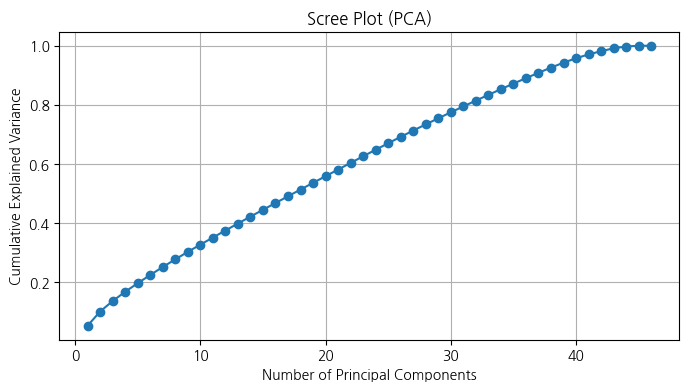

In [35]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 3-1: PCA로 차원 축소 (설명력 중심, 시각화 & 클러스터링 목적)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 누적 기여율 확인
cumulative_var = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot (PCA)')
plt.grid(True)
plt.show()

PCA는 '정보 손실 없이 압축'하는 기술이고,

보통 누적 설명력 70~90% 되는 PC 수만큼 사용하는 게 가장 실용적이다.

- PC 20개: 설명력 약 85% 수준, 모델 간결

- PC 25개: 설명력 약 90% 이상, 정보 손실 최소화



## PC 25개로 KMeans 클러스터링 + Elbow & Silhouette 시각화

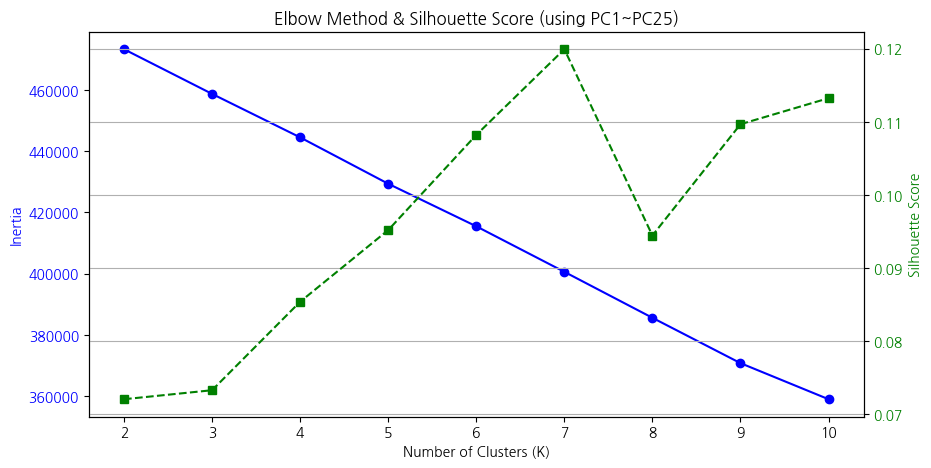

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 4: PC1~PC25 사용
X_selected = X_pca[:, :25]

# 클러스터 수 후보
k_range = range(2, 11)
inertias = []
silhouettes = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_selected)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_selected, labels))

# 시각화
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(k_range, inertias, 'o-', color='blue', label='Inertia (Elbow)')
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Inertia', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(k_range, silhouettes, 's--', color='green', label='Silhouette Score')
ax2.set_ylabel('Silhouette Score', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Elbow Method & Silhouette Score (using PC1~PC25)')
plt.grid(True)
plt.show()

- 실루엣만

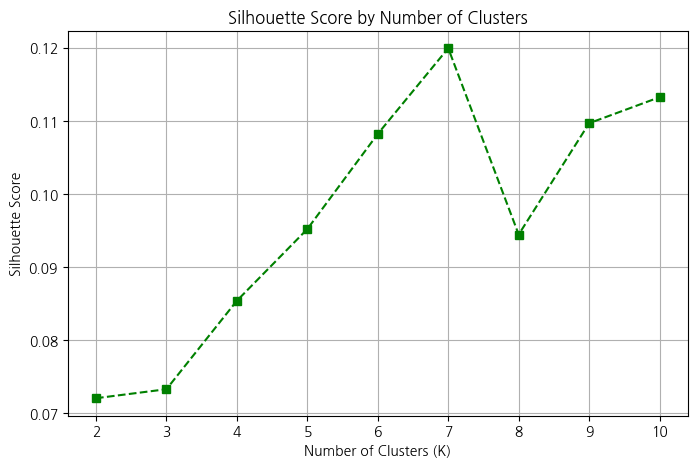

In [38]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Silhouette만 따로 시각화 (PC1~PC25 기준)
X_selected = X_pca[:, :25]
k_range = range(2, 11)
silhouettes = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_selected)
    silhouettes.append(silhouette_score(X_selected, labels))

# 그래프 그리기
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouettes, marker='s', linestyle='--', color='green')
plt.title('Silhouette Score by Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

## 클러스터링

In [37]:
from sklearn.cluster import KMeans

# KMeans 클러스터링 (K=7)
kmeans = KMeans(n_clusters=7, random_state=42)
cluster_labels = kmeans.fit_predict(X_selected)  # ← X_selected = PCA 25개 사용한 데이터

# 클러스터 결과를 DataFrame에 추가
import numpy as np
df_clusters = pd.DataFrame(X_selected, columns=[f'PC{i+1}' for i in range(X_selected.shape[1])])
df_clusters['cluster'] = cluster_labels

# 각 군집별 인원 수 확인
df_clusters['cluster'].value_counts().sort_index()

,count
cluster,
0,536
1,649
2,7344
3,687
4,5316
5,423
6,1261


## 클러스터별 평균값 히트맵

지출 변수 하나만 너무 커서 나머지 값들이 작아져 버려 따로 히트맵ㅇㄹ

In [59]:
df_2024['cluster'] = df_clusters['cluster']

In [60]:
activity_vars = ['Q8_1a1', 'Q8_1a2', 'Q8_1a3'] # 활동
psych_vars = ['Q11', 'Q13', 'Q14'] #심리
spend_vars = ['M일HAP', '총액1인TOT2'] # 지출

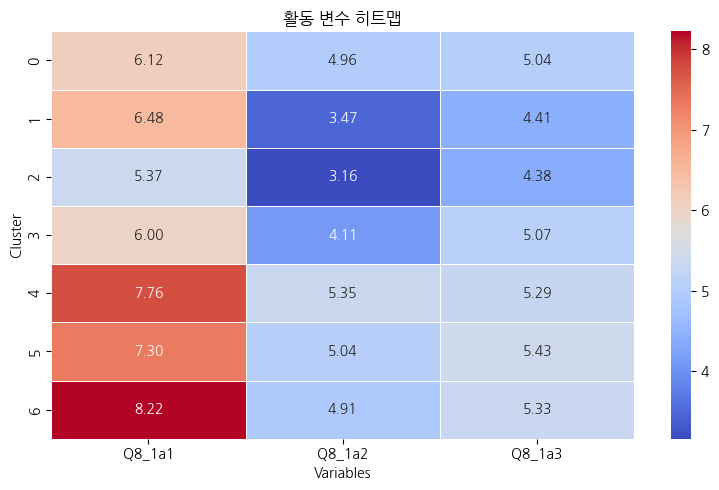

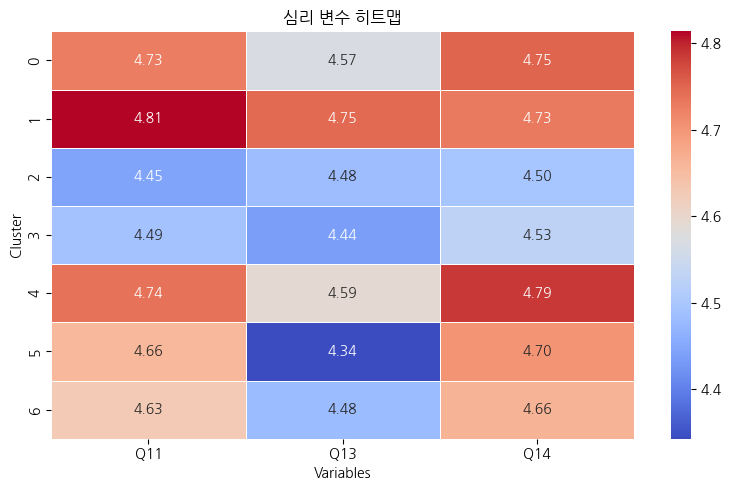

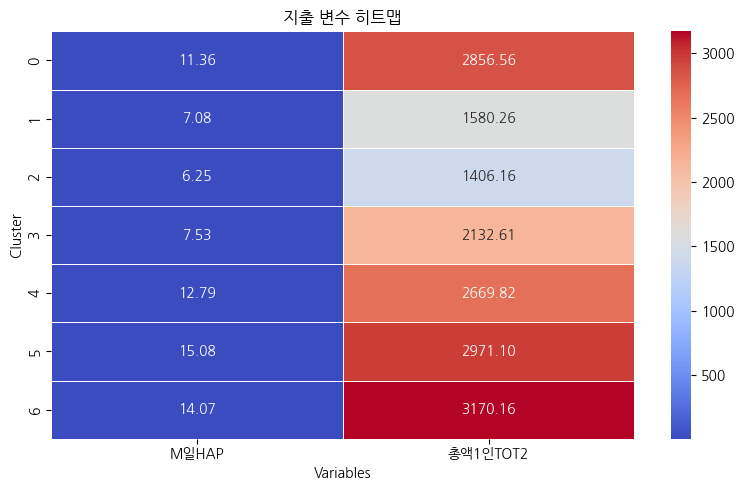

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cluster_heatmap(df, var_list, title):
    cluster_mean = df.groupby('cluster')[var_list].mean()
    plt.figure(figsize=(8, 5))
    sns.heatmap(cluster_mean, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
    plt.title(title)
    plt.ylabel('Cluster')
    plt.xlabel('Variables')
    plt.tight_layout()
    plt.show()

# 🔷 활동 변수 히트맵
plot_cluster_heatmap(df_2024, activity_vars, '활동 변수 히트맵')

# 🔷 심리 변수 히트맵
plot_cluster_heatmap(df_2024, psych_vars, '심리 변수 히트맵')

# 🔷 지출 변수 히트맵
plot_cluster_heatmap(df_2024, spend_vars, '지출 변수 히트맵')


| Cluster | 🎯 활동 변수 인사이트                      | 💭 심리 변수 인사이트                            | 💰 지출 변수 인사이트                               |
| ------- | ---------------------------------- | ---------------------------------------- | ------------------------------------------- |
| **0**   | 평균 이상 (`Q8_1a1`: 6.12), 나머진 보통     | 전반적으로 높은 편 (`Q11`=4.73, `Q14`=4.75)      | 체류일 긴 편 (11.36일), 지출도 높은 편 (2856.56)        |
| **1**   | 활동 만족 보통, `Q8_1a2`와 `Q8_1a3` 낮음    | **모든 심리 변수 최고** (`Q11`=4.81, `Q13`=4.75) | 체류일 짧음 (7.08일), 지출 중하위권 (1580.26)           |
| **2**   | 전반적으로 **활동 만족 낮음** (`Q8_1a1`=5.37) | **모든 심리 변수 낮음** (`Q11`=4.45, `Q13`=4.48) | 체류일 가장 짧음 (6.25일), **지출 가장 낮음** (1406.16)   |
| **3**   | 무난한 수준 (`Q8_1a1`=6.00)             | 평균 이하 (`Q11`=4.49, `Q13`=4.44)           | 평균적 체류일 (7.53일), 지출도 중간 수준 (2132.61)        |
| **4**   | **활동 만족 매우 높음** (`Q8_1a1`=7.76)    | `Q14`(추천의향) 최고 (4.79), 전반적으로 높음          | 체류일 길고 (12.79일), 지출도 많음 (2669.82)           |
| **5**   | 활동 만족도 높음 (`Q8_1a1`=7.30), 안정적     | `Q13`(재방문) **가장 낮음** (4.34)              | **체류일 가장 김** (15.08일), **지출 상위권** (2971.10) |
| **6**   | `Q8_1a1` 최고점 (8.22), 활동 참여 매우 활발   | 무난한 편 (`Q11`=4.63, `Q14`=4.66)           | **지출 최고** (3170.16), 체류일도 김 (14.07일)        |


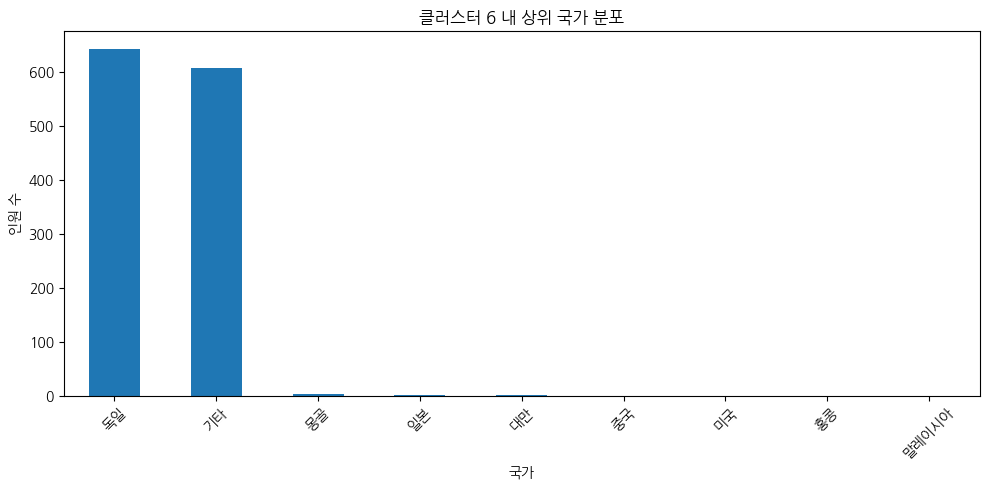

In [64]:
# 클러스터 6만 필터링
cluster6 = df_2024[df_encoded['cluster'] == 6]

# 국가 분포 집계
country_counts = cluster6['국가명'].value_counts()

# 상위 10개 시각화 (선택)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
country_counts.head(10).plot(kind='bar')
plt.title('클러스터 6 내 상위 국가 분포')
plt.xlabel('국가')
plt.ylabel('인원 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Cluster 6: 활동/지출 최상, 전체 핵심 타깃 가능성

Cluster 1: 심리 만족도 최고, 재방문·추천 마케팅 적합

Cluster 5: 체류/지출 높지만 재방문 의향 낮음 → 원인 분석 필요

Cluster 2: 모든 지표 낮음, 타깃 우선순위 낮음

## 클러스터별 관광객 비율

In [65]:
import pandas as pd

# 클러스터별 개수 및 비율 계산
cluster_counts = df_encoded['cluster'].value_counts().sort_index()
cluster_props = df_encoded['cluster'].value_counts(normalize=True).sort_index() * 100

# 요약 테이블 출력
cluster_summary = pd.DataFrame({
    '방문자 수': cluster_counts,
    '비율 (%)': cluster_props.round(2)
})
print(cluster_summary)

         방문자 수  비율 (%)
cluster               
0          536    3.31
1          649    4.00
2         7344   45.29
3          687    4.24
4         5316   32.78
5          423    2.61
6         1261    7.78


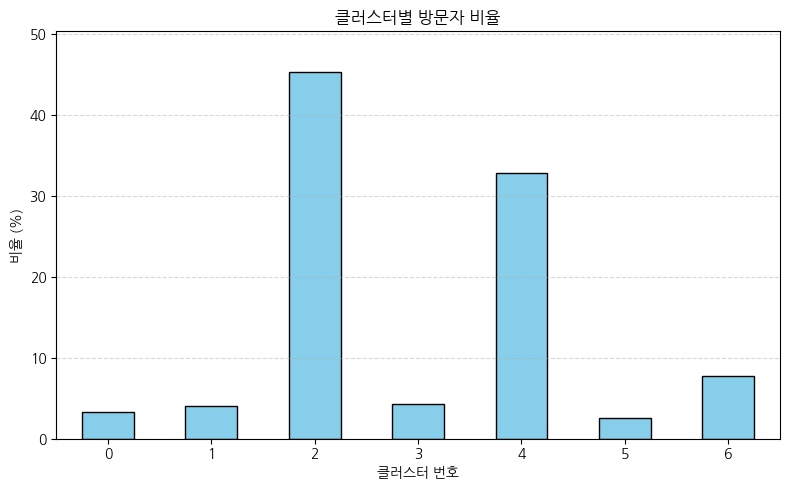

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
cluster_props.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('클러스터별 방문자 비율')
plt.xlabel('클러스터 번호')
plt.ylabel('비율 (%)')
plt.xticks(rotation=0)
plt.ylim(0, cluster_props.max() + 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

| Cluster     | 방문자 비율 (%)  | 요약 설명                     |
| ----------- | ----------- | ------------------------- |
| **2**       | **45% 이상**  | 가장 많은 방문자, 핵심 볼륨층         |
| **4**       | **33% 전후**  | 두 번째로 많음, 중추 타깃층 가능       |
| **6**       | 약 8%        | 소수지만 지출/체류일 높음 → 프리미엄층    |
| **0,1,3,5** | 각각 2\~5% 수준 | 비율은 낮지만 심리/지출 특성 따라 활용 가능 |


In [69]:
activity_map = {
    1: "식도락",
    2: "쇼핑",
    3: "자연경관 감상",
    4: "휴양/웰니스",
    5: "고궁/역사 유적지",
    6: "전통문화체험",
    7: "박물관/전시관",
    8: "K-POP/한류",
    9: "공연 관람(연극 등)",
    10: "지역 축제",
    11: "유흥/카지노",
    12: "오락(놀이공원 등)",
    13: "뷰티/미용",
    14: "치료/건강검진",
    15: "스포츠 관람",
    16: "스포츠 참가",
    17: "국제회의",
    18: "비즈니스",
    19: "연수/연구",
    20: "기타"
}

In [70]:
def get_top_activities(df, cluster_num, top_n=5):
    subset = df_2024[df_2024['cluster'] == cluster_num]
    all_activities = pd.concat([
        subset['Q8_1a1'],
        subset['Q8_1a2'],
        subset['Q8_1a3']
    ])

    activity_counts = all_activities.value_counts().sort_values(ascending=False).head(top_n)

    print(f"\n🟢 클러스터 {cluster_num}의 상위 {top_n} 활동:")
    for code, count in activity_counts.items():
        activity_name = activity_map.get(code, f"Unknown({code})")
        print(f"  - {activity_name} (코드 {code}): {count}회")

# 클러스터 2, 4, 6 확인
get_top_activities(df_encoded, 2)
get_top_activities(df_encoded, 4)
get_top_activities(df_encoded, 6)


🟢 클러스터 2의 상위 5 활동:
  - 식도락 (코드 1.0): 5980회
  - 쇼핑 (코드 2.0): 5360회
  - 자연경관 감상 (코드 3.0): 2663회
  - 고궁/역사 유적지 (코드 5.0): 1145회
  - K-POP/한류 (코드 8.0): 762회

🟢 클러스터 4의 상위 5 활동:
  - 고궁/역사 유적지 (코드 5.0): 2565회
  - 자연경관 감상 (코드 3.0): 1966회
  - 쇼핑 (코드 2.0): 1949회
  - 식도락 (코드 1.0): 1781회
  - 박물관/전시관 (코드 7.0): 1090회

🟢 클러스터 6의 상위 5 활동:
  - 고궁/역사 유적지 (코드 5.0): 562회
  - 쇼핑 (코드 2.0): 559회
  - 식도락 (코드 1.0): 476회
  - 자연경관 감상 (코드 3.0): 455회
  - 비즈니스 (코드 18.0): 261회


In [71]:
def show_country_distribution(df, cluster_list, country_col='Q3', top_n=10):
    for cluster_num in cluster_list:
        subset = df[df['cluster'] == cluster_num]
        country_counts = subset[country_col].value_counts().head(top_n)
        print(f"\n🟢 클러스터 {cluster_num} 국가 분포 (상위 {top_n}):")
        print(country_counts)

show_country_distribution(df_2024, cluster_list=[2, 4, 6], country_col='국가명')


🟢 클러스터 2 국가 분포 (상위 10):
국가명
중국       1957
일본       1913
홍콩       1174
대만        727
말레이시아     572
미국        356
호주        200
필리핀       127
프랑스       123
영국         60
Name: count, dtype: int64

🟢 클러스터 4 국가 분포 (상위 10):
국가명
싱가포르    1152
중동       500
베트남      435
프랑스      413
호주       406
인도       394
영국       365
몽골       319
일본       300
필리핀      292
Name: count, dtype: int64

🟢 클러스터 6 국가 분포 (상위 10):
국가명
독일       643
기타       607
몽골         3
일본         2
대만         2
중국         1
미국         1
홍콩         1
말레이시아      1
Name: count, dtype: int64
